# HealtNotebook 



Welcome to HeathNotebook!

This is a notebook for health data analysis.

In [1]:
# Import modules
import modules.data_module as data_module
import numpy as np
import pickle
import warnings
# Supress warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

First, we would ask you to fill this short survey. Run the cell below to see the survey. Once you are done, click 'Submit' to save your answers.

In [2]:
import modules.questionnaire_module

In [13]:
# Get user data from the survey
user_data = modules.questionnaire_module.get_data()
# Load data
df = data_module.get_data()

print(user_data)

{'Name': 'Tatu', 'Age': 22, 'Sleeptime (h)': 1.0, 'Latency': 0, 'Restfulness': 1, 'Wakes': 0, 'Stress': 1, 'Steps': 0, 'Food Healthiness': 1, 'Exercise scale': 0}


Next we will compare your answers to your peers. In the plots below, you can see how your answers compare to our data.

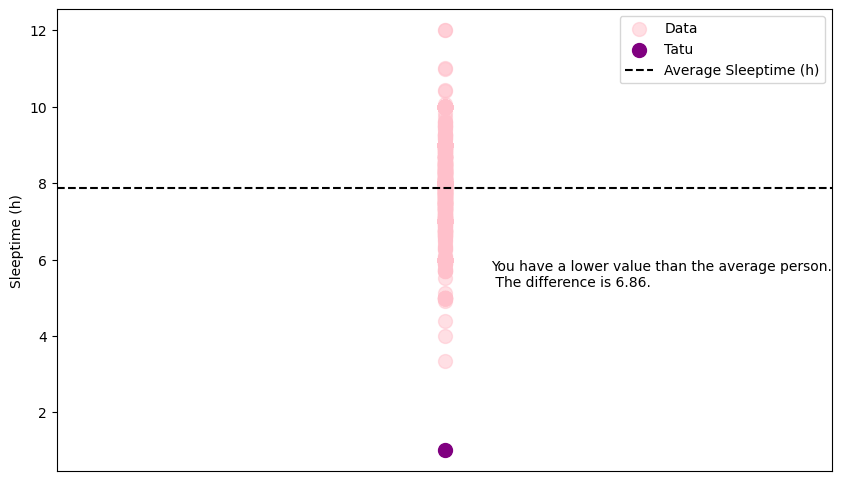

In [6]:
# plot using the data_module plot function 
data_module.plot(dataset = df,
                 userdata= user_data,
                 plotted_variables = ['Sleeptime (h)'])  

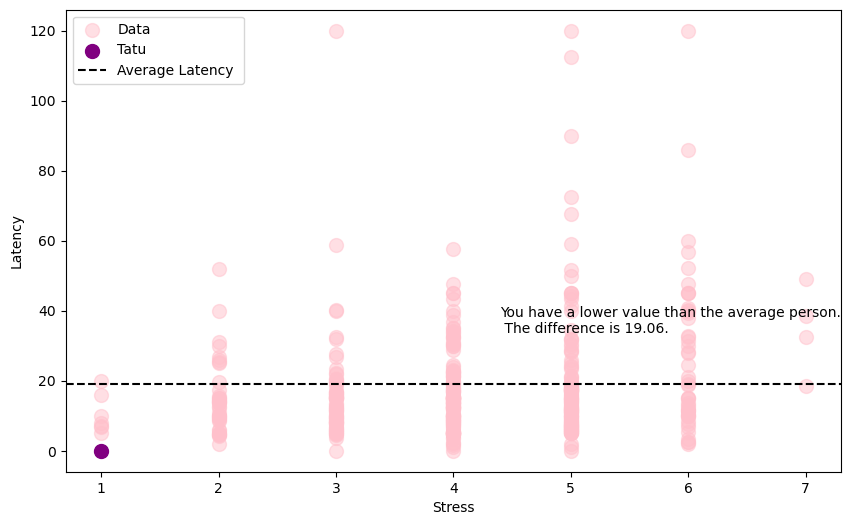

In [7]:
# steps and latency scatter plot
# plot using the data_module plot function 
data_module.plot(dataset = df,
                 userdata= user_data,
                 plotted_variables = ['Stress', 'Latency']) 

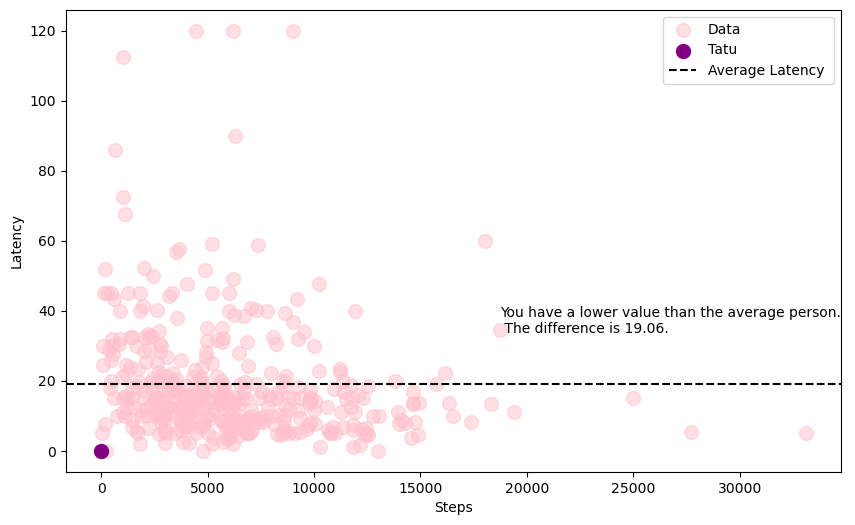

In [8]:
# steps and latency scatter plot
# steps and latency scatter plot
# plot using the data_module plot function
data_module.plot(dataset = df,
                 userdata= user_data,
                 plotted_variables = ['Steps', 'Latency'])

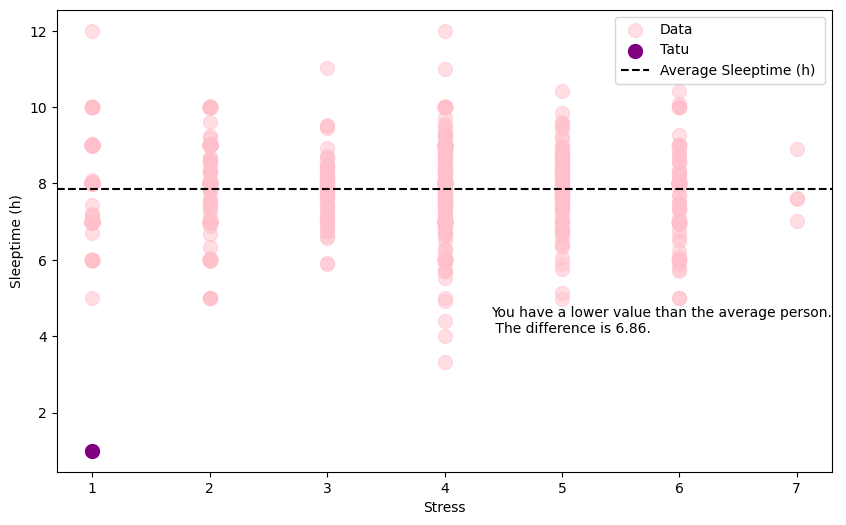

In [9]:
data_module.plot(dataset = df,
                 userdata= user_data,
                 plotted_variables = ['Stress', 'Sleeptime (h)'])

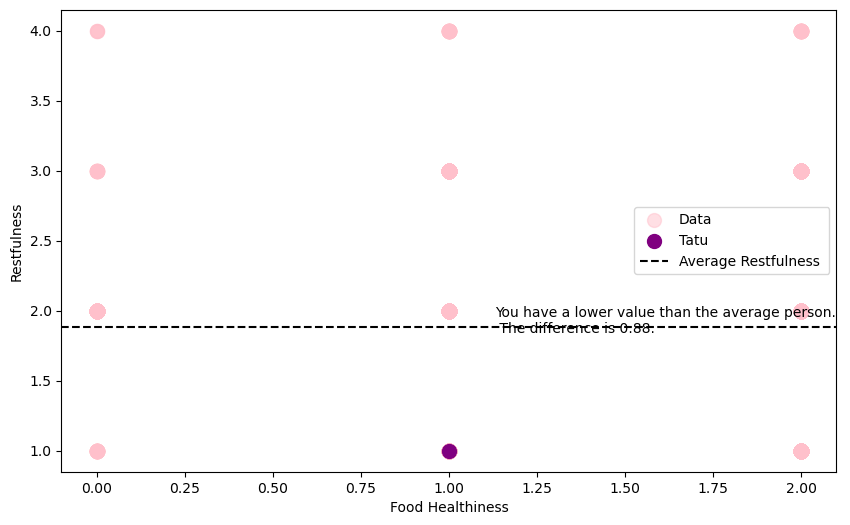

In [10]:
# plot using the data_module plot function
data_module.plot(dataset = df,
                 userdata= user_data,
                 plotted_variables = ['Food Healthiness', 'Restfulness'])

Below we will predict your sleep time and sleep latency based on your answers to the survey. By sleep latency we mean the time it takes to fall asleep after going to bed. We will also tell you how much you can improve your sleep by increasing your daily step count and reducing your level of stress.

In [17]:
with open('./data/models/covid_model_sleeptime.pkl', 'rb') as f:
    model_sleeptime = pickle.load(f)

with open('./data/models/covid_model_latency.pkl', 'rb') as f:
    model_latency = pickle.load(f)

with open("./data/models/uhs_model_rest.pkl", "rb") as f:
    model_rest = pickle.load(f)

# Predict sleep time and latecy for the user
x = np.array([user_data["Steps"], user_data["Stress"]])
pred_sleep = model_sleeptime.predict(x.reshape(-1, 2))
pred_latency = model_latency.predict(x.reshape(-1, 2))
print("Predicted sleeptime", round(pred_sleep[0], 2), "(h) and predicted latency", round(pred_latency[0], 2), "(min).")

# Make another prediction with decreased stress and added exercise
# (higher stress level actually means lower stress)
x = np.array([user_data["Steps"] + 2000, user_data["Stress"] + 7])
pred_sleep_alt = model_sleeptime.predict(x.reshape(-1, 2))
pred_latency_alt = model_latency.predict(x.reshape(-1, 2))
diff_sleep = (pred_sleep_alt[0] - pred_sleep[0]) * 60
diff_latency = pred_latency_alt[0] - pred_latency[0]
print("By moderately decresing your stress level and adding steps to your day you can achieve the following changes.")
print("Change in your sleep time:", round(diff_sleep, 1), "minutes.")
print("Change in your sleep latency:", round(diff_latency, 1), "minutes.")

Predicted sleeptime 7.73 (h) and predicted latency 30.52 (min).
By moderately decresing your stress level and adding steps to your day you can achieve the following changes.
Change in your sleep time: -9.2 minutes.
Change in your sleep latency: -21.1 minutes.


Finally, we will predict how much you can improve the restfulness of your sleep by imrpving your diet.

In [19]:
pred_rest = model_rest.predict(np.array([user_data["Food Healthiness"]]).reshape(-1, 1))

if food == 2:
    text = "Congratulations! You have healthy food habits."
elif food == 1:
    pred_rest_alt = model_rest.predict(np.array([user_data["Food Healthiness"] + 1]).reshape(-1, 1))
    change = 100 * (pred_rest_alt - pred_rest) / pred_rest
    change = round(change[0][0], 2)
    text = f"You can improve the restfulness of your sleep {change} % by improving your diet."
else:
    pred_rest_alt = model_rest.predict(np.array([user_data["Food Healthiness"] + 2]).reshape(-1, 1))
    change = 100 * (pred_rest_alt - pred_rest) / pred_rest
    change = round(change[0][0], 2)
    text = f"You can improve the restfulness of your sleep {change} % by improving your diet."

print(text)

You can improve the restfulness of your sleep 0.53 % by improving your diet.
